In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
bom_movie_gross.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [ ]:
def strtofloat(x):
    if ',' in x:
        x = x.replace(',', '')
        x = float(x)* 1000000
        return x
    else:
        x = float(x)
        return x


#strtofloat("1,131.6") 
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].map(lambda x: strtofloat(x) if type(x) == str else x)
bom_movie_gross['foreign_gross'].map(lambda x: type(x))

In [24]:
bom_movie_gross['worldwide_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']
bom_movie_gross.sort_values('domestic_gross', ascending = False)[:10]

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
1872,Star Wars: The Force Awakens,BV,936700000.0,1.131600e+09,2015,2.068300e+09
3080,Black Panther,BV,700100000.0,6.469000e+08,2018,1.347000e+09
3079,Avengers: Infinity War,BV,678800000.0,1.369500e+09,2018,2.048300e+09
1873,Jurassic World,Uni.,652300000.0,1.019400e+09,2015,1.671700e+09
727,Marvel's The Avengers,BV,623400000.0,8.955000e+08,2012,1.518900e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,7.124000e+08,2017,1.332600e+09
3082,Incredibles 2,BV,608600000.0,6.342000e+08,2018,1.242800e+09
2323,Rogue One: A Star Wars Story,BV,532200000.0,5.239000e+08,2016,1.056100e+09
2759,Beauty and the Beast (2017),BV,504000000.0,7.595000e+08,2017,1.263500e+09
2324,Finding Dory,BV,486300000.0,5.423000e+08,2016,1.028600e+09


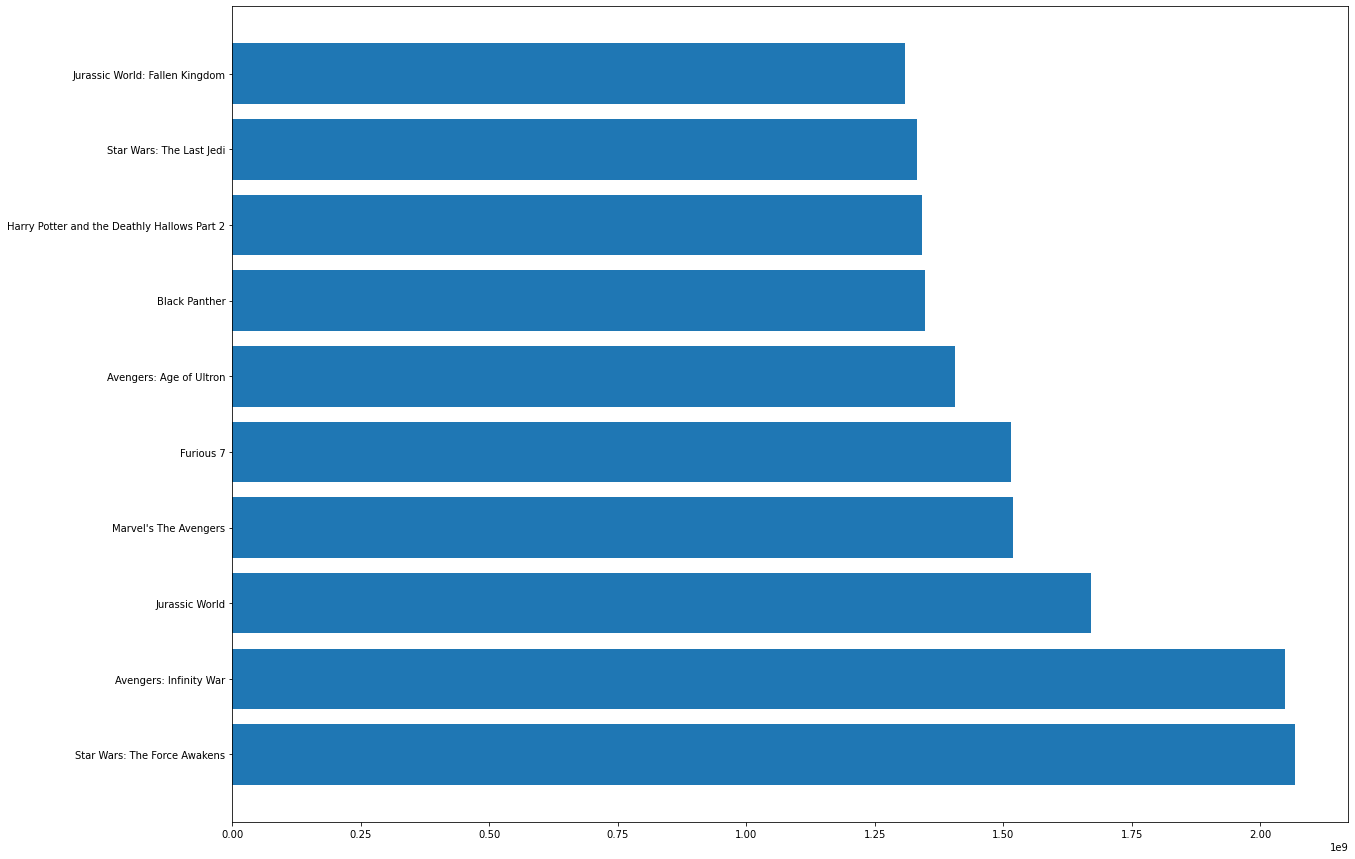

In [31]:
fig, ax = plt.subplots(figsize=(20, 15))
x = bom_movie_gross.sort_values('worldwide_gross', ascending = False)[:10]['title']
y = bom_movie_gross.sort_values('worldwide_gross', ascending = False)[:10]['worldwide_gross']
ax.barh(x, y);


In [5]:
imdb_name_basics = pd.read_csv('data/imdb.name.basics.csv')
imdb_name_basics.info()
imdb_name_basics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [6]:
imdb_title_akas = pd.read_csv('data/imdb.title.akas.csv')
imdb_title_akas.info()
imdb_title_akas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [7]:
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv')
imdb_title_basics.info()
imdb_title_basics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [8]:
imdb_title_crew = pd.read_csv('data/imdb.title.crew.csv')
imdb_title_crew.info()
imdb_title_crew

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [9]:
imdb_title_principals = pd.read_csv('data/imdb.title.principals.csv')
imdb_title_principals.info()
imdb_title_principals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [10]:
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv')
imdb_title_ratings.info()
imdb_title_ratings.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [11]:
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [14]:
# imdb_title_basics.set_index('tconst', inplace=True)
# imdb_title_ratings.set_index('tconst', inplace=True)
# imdb_title_crew.set_index('tconst', inplace=True)
# imdb_title_principals.set_index('tconst', inplace=True)
# imdb_frankenstein = imdb_title_basics.join(imdb_title_ratings, how='left')
# imdb_frankenstein = imdb_frankenstein.join(imdb_title_crew, how='left')
# imdb_frankenstein = imdb_frankenstein.join(imdb_title_principals, how='left')
# imdb_frankenstein.reset_index(inplace=True)
# imdb_frankenstein.set_index('nconst', inplace=True)
# imdb_name_basics.set_index('nconst', inplace=True)
# imdb_frankenstein = imdb_frankenstein.join(imdb_name_basics, how='left')
imdb_frankenstein.reset_index(inplace=True)

In [17]:

imdb_frankenstein.info()
# imdb_frankenstein.sort_values('numvotes', ascending=False)[:1000].value_counts('genres')[:20]
imdb_frankenstein.sort_values('numvotes', ascending=False)[:10]
imdb_frankenstein.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030876 entries, 0 to 1030875
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   nconst              1028186 non-null  object 
 1   tconst              1030876 non-null  object 
 2   primary_title       1030876 non-null  object 
 3   original_title      1030855 non-null  object 
 4   start_year          1030876 non-null  int64  
 5   runtime_minutes     828893 non-null   float64
 6   genres              1007380 non-null  object 
 7   averagerating       629926 non-null   float64
 8   numvotes            629926 non-null   float64
 9   directors           1014587 non-null  object 
 10  writers             861040 non-null   object 
 11  ordering            1028186 non-null  float64
 12  category            1028186 non-null  object 
 13  job                 177684 non-null   object 
 14  characters          393360 non-null   object 
 15  primary_name   

,start_year,runtime_minutes,averagerating,numvotes,ordering,birth_year,death_year
count,1.030876e+06,828893.000000,629926.000000,6.299260e+05,1.028186e+06,234048.000000,11843.00000
mean,2.014607e+03,90.390172,6.261943,4.108752e+03,4.739847e+00,1967.742617,1995.25247
std,2.742710e+00,111.022517,1.452052,3.275891e+04,2.747446e+00,22.099106,64.57055
min,2.010000e+03,1.000000,1.000000,5.000000e+00,1.000000e+00,1.000000,17.00000
25%,2.012000e+03,76.000000,5.400000,1.600000e+01,2.000000e+00,1959.000000,2004.00000
50%,2.015000e+03,90.000000,6.400000,6.500000e+01,4.000000e+00,1971.000000,2014.00000
75%,2.017000e+03,102.000000,7.300000,3.670000e+02,7.000000e+00,1980.000000,2017.00000
max,2.115000e+03,51420.000000,10.000000,1.841066e+06,1.000000e+01,2014.000000,2019.00000


In [ ]:
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t')
rt_movie_info.info()
rt_movie_info

In [ ]:
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter='\t', encoding = 'unicode_escape')
rt_reviews.info()
rt_reviews.head(20)

In [ ]:
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tmdb_movies.info()
tmdb_movies

In [34]:
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')
tn_movie_budgets.info()
tn_movie_budgets.sort_values('worldwide_gross', ascending=False)[:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3737,38,"Aug 21, 2009",Fifty Dead Men Walking,"$10,000,000",$0,"$997,921"
3432,33,"Sep 30, 2005",Duma,"$12,000,000","$870,067","$994,790"
5062,63,"Apr 1, 2011",Insidious,"$1,500,000","$54,009,150","$99,870,886"
883,84,"Apr 2, 2004",Hellboy,"$60,000,000","$59,623,958","$99,823,958"
5613,14,"Mar 21, 1980",Mad Max,"$200,000","$8,750,000","$99,750,000"
1078,79,"Aug 17, 2018",Alpha,"$51,000,000","$35,851,379","$99,624,873"
1682,83,"Dec 23, 1994",Street Fighter,"$35,000,000","$33,423,000","$99,423,000"
1792,93,"Jun 16, 2006",Nacho Libre,"$32,000,000","$80,197,993","$99,296,462"
4373,74,"Jun 4, 1999",Desert Blue,"$5,000,000","$99,147","$99,147"
2343,44,"Nov 21, 2007",Hitman,"$24,000,000","$39,687,694","$99,135,571"


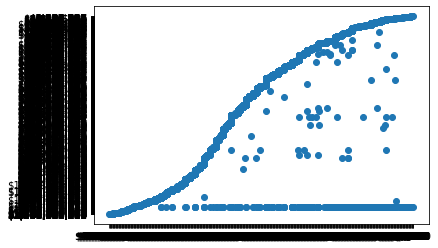

In [33]:
fig, ax = plt.subplots()
w = tn_movie_budgets['production_budget']
f =  tn_movie_budgets['worldwide_gross']
ax.scatter(w, f);